# Titanic - kaggle project

## The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Target= Survived

## Feature Describsion

Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

Sex	

Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


******variable notes:******
    
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

from xgboost.sklearn import XGBClassifier


In [3]:
# This is the new library for data visvalization and data exploration 
import lux
from lux.vis.VisList import VisList

In [ ]:
import missingno

In [69]:
import seaborn as sns
%matplotlib inline

In [6]:
datafile_train=r"C:\Users\surendran\Desktop\python\project\titanic\train.csv"
datafile_test=r"C:\Users\surendran\Desktop\python\project\titanic\test.csv"
ti_train=pd.read_csv(datafile_train)
ti_test=pd.read_csv(datafile_test)

In [7]:
ti_train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
ti_train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
ti_train.shape

(891, 12)

In [10]:
ti_test.shape

(418, 11)

In [11]:
ti_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
ti_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
# test data did not have target
# we should add empty traget  in order to combine both test and train
# here we combine both test and train for data preparation

In [15]:
ti_test['Survived']=np.nan

In [16]:
ti_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [17]:
ti_train['data']='train'
ti_test['data']='test'

In [18]:
ti_test=ti_test[ti_train.columns]  # the columns in the two data frames should be in the same order to enable concatenation

In [19]:
ti_all=pd.concat([ti_train,ti_test],axis=0)

In [20]:
ti_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [21]:
ti_all.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [22]:
ti_all.shape

(1309, 13)

In [23]:
list(zip(ti_all.columns,ti_all.dtypes,ti_all.nunique()))

[('PassengerId', dtype('int64'), 1309),
 ('Survived', dtype('float64'), 2),
 ('Pclass', dtype('int64'), 3),
 ('Name', dtype('O'), 1307),
 ('Sex', dtype('O'), 2),
 ('Age', dtype('float64'), 98),
 ('SibSp', dtype('int64'), 7),
 ('Parch', dtype('int64'), 8),
 ('Ticket', dtype('O'), 929),
 ('Fare', dtype('float64'), 281),
 ('Cabin', dtype('O'), 186),
 ('Embarked', dtype('O'), 3),
 ('data', dtype('O'), 2)]

In [24]:
ti_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [25]:
ti_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'data'],
      dtype='object')

In [27]:
import missingno

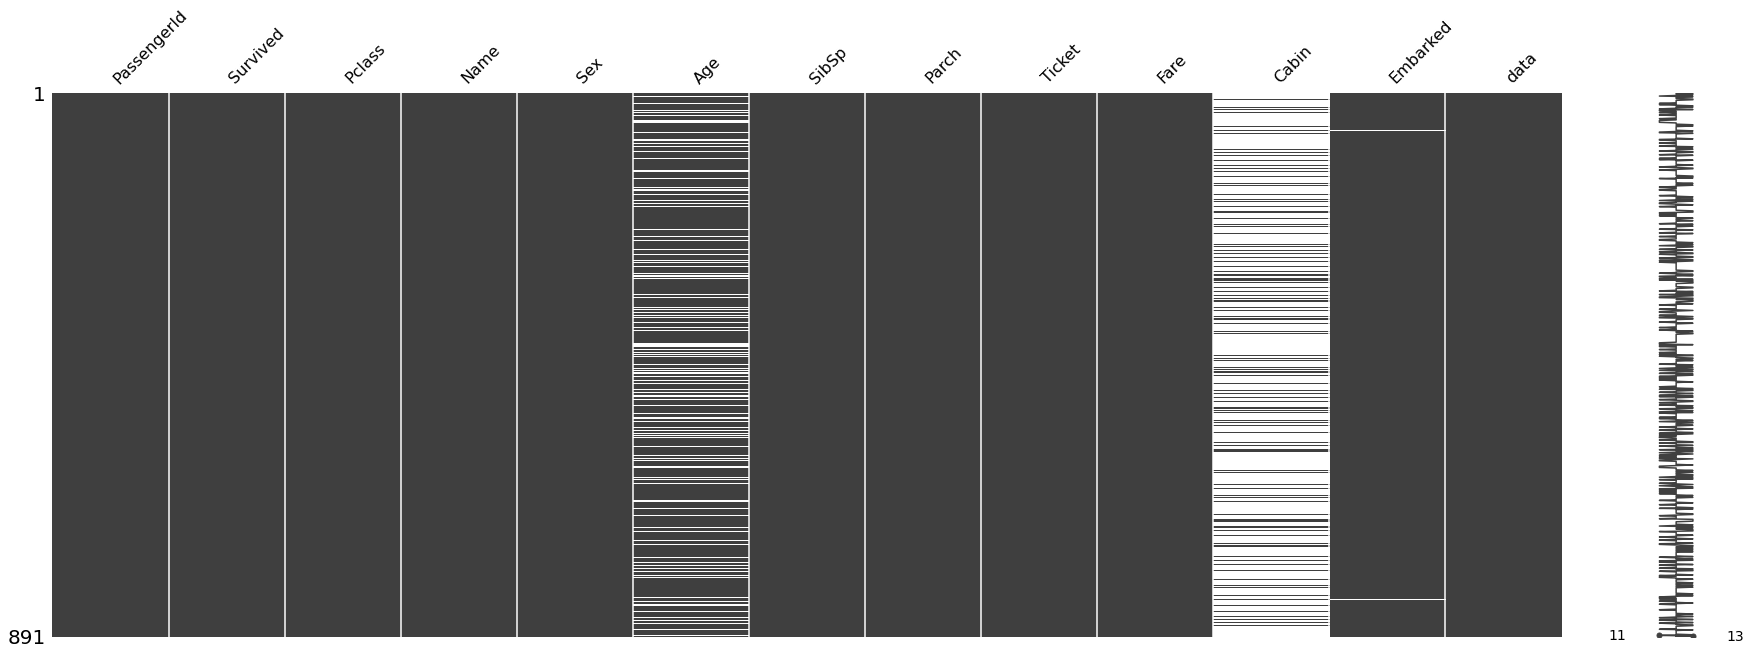

In [28]:
# missing values in the data
missingno.matrix(ti_train,figsize=(30,10))

In [29]:
# here we can see the lots of  missing values in age and cabin

### 1.Feature = 'Pclass'

In [31]:
ti_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [32]:
 VisList(["Pclass=?","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Survived  -- [Pclass=3] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Pclass=1] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Pclass=2] ) mark: bar, score: 0.00 >]

In [33]:
 VisList(["Pclass","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Pclass, color: Survived) mark: bar, score: 0.00 >]

In [34]:
Pclass_dummies=pd.get_dummies(ti_all["Pclass"],prefix="Pclass")

In [35]:
Pclass_dummies.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### 2. Feature : drop Name and PassengerId

In [36]:
# since it kind of identifier

### 3.Feature : sex

In [37]:
ti_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [38]:
 VisList(["Sex=?","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Survived  -- [Sex=male]   ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Sex=female] ) mark: bar, score: 0.00 >]

In [39]:
VisList(["Sex","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Sex, color: Survived) mark: bar, score: 0.00 >]

In [40]:
Sex_dummies=pd.get_dummies(ti_all["Sex"],prefix="Sex")

In [41]:
Sex_dummies.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### 4.Feature : Sibsp

In [42]:
ti_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [43]:
VisList(["SibSp=?","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Survived  -- [SibSp=1] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [SibSp=0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [SibSp=3] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [SibSp=4] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [SibSp=2] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [SibSp=5] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [SibSp=8] ) mark: bar, score: 0.00 >]

In [44]:
VisList(["SibSp","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: SibSp, color: Survived) mark: bar, score: 0.00 >]

In [45]:
import seaborn as sns

%matplotlib inline

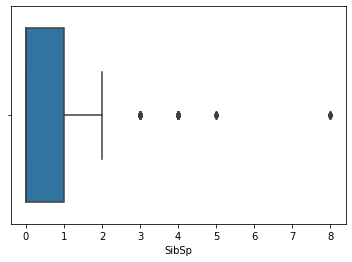

In [46]:
sns.boxplot(x="SibSp",data=ti_train)

In [47]:
# here takking dummies foe 0 and 1 sibsp 
#since others freq is less than 5% 

In [48]:
########### SibSp_converted=ti_all["SibSp"][ti_all["SibSp"]<=1]###################

In [49]:
SibSp_dummies=pd.get_dummies(ti_all["SibSp"],prefix="SibSp")
SibSp_dummies.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [50]:
SibSp_dummies.columns

Index(['SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8'],
      dtype='object')

In [51]:
SibSp_dummies=SibSp_dummies.drop(['SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8'],axis=1)

In [52]:
SibSp_dummies

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### 5. Feature: Parch

In [53]:
ti_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [54]:
VisList(["Parch=?","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Survived  -- [Parch=0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Parch=1] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Parch=2] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Parch=5] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Parch=3] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Parch=4] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Parch=6] ) mark: bar, score: 0.00 >]

In [55]:
VisList(["Parch","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Parch, color: Survived) mark: bar, score: 0.00 >]

In [56]:
# Parch_converted=ti_all["Parch"][ti_all["Parch"]<=2]

In [57]:
# we are taking 2 as frequency cut off here 

In [58]:
Parch_dummies=pd.get_dummies(ti_all["Parch"],prefix="Parch")
Parch_dummies.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [59]:
Parch_dummies.columns

Index(['Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Parch_9'],
      dtype='object')

In [60]:
Parch_dummies=Parch_dummies.drop(['Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Parch_9'],axis=1)

In [61]:
Parch_dummies

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### 6.Feature :Ticket

In [62]:
ti_train.Ticket.value_counts()

1601                7
CA. 2343            7
347082              7
3101295             6
347088              6
                   ..
STON/O2. 3101290    1
PC 17483            1
113055              1
4136                1
C 7075              1
Name: Ticket, Length: 681, dtype: int64

In [63]:
VisList(["Ticket","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Ticket, color: Survived) mark: bar, score: 0.00 >]

In [64]:
# drop ticket number

### 7.Feature : fare

In [70]:
ti_train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [71]:
VisList(["Fare","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: MEAN(Fare), y: Survived) mark: bar, score: 0.00 >]

In [72]:
ti_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

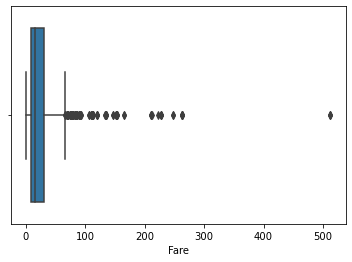

In [73]:
sns.boxplot(x="Fare",data=ti_train)

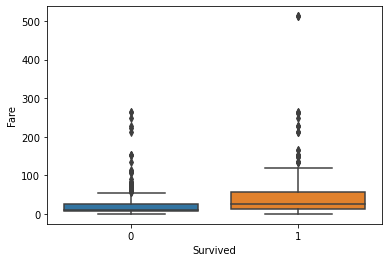

In [74]:
sns.boxplot(x="Survived",y="Fare",data=ti_train)

In [75]:
fare_range=pd.cut(ti_all['Fare'],bins=5,duplicates='drop')

In [76]:
fare_range.value_counts()

(-0.512, 102.466]     1224
(102.466, 204.932]      46
(204.932, 307.398]      34
(409.863, 512.329]       4
(307.398, 409.863]       0
Name: Fare, dtype: int64

### Assumption :
we considering only values between 0-100 after that we bining it and creating dummies for each 

### Proof
Above decision is taken because most of outliers lies above 100 ( visuvalization data  proof is shown above)

In [77]:
# fare=pd.DataFrame()
# fare["value"]=ti_all["Fare"][ti_all["Fare"]<100] # fare values only under 100 is consider

In [78]:
fare_range=pd.cut(ti_all["Fare"],bins=20)
fare_range.value_counts()

(-0.512, 25.616]      827
(25.616, 51.233]      243
(51.233, 76.849]      102
(76.849, 102.466]      52
(128.082, 153.699]     25
(204.932, 230.548]     18
(102.466, 128.082]     17
(256.165, 281.781]     13
(153.699, 179.315]      4
(486.713, 512.329]      4
(230.548, 256.165]      3
(461.096, 486.713]      0
(281.781, 307.398]      0
(179.315, 204.932]      0
(307.398, 333.014]      0
(333.014, 358.63]       0
(358.63, 384.247]       0
(384.247, 409.863]      0
(409.863, 435.48]       0
(435.48, 461.096]       0
Name: Fare, dtype: int64

In [79]:
Fare_dummies=pd.get_dummies(fare_range,prefix='Fare_range')

In [80]:
Fare_dummies.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [81]:
Fare_dummies.columns

Index(['Fare_range_(-0.512, 25.616]', 'Fare_range_(25.616, 51.233]',
       'Fare_range_(51.233, 76.849]', 'Fare_range_(76.849, 102.466]',
       'Fare_range_(102.466, 128.082]', 'Fare_range_(128.082, 153.699]',
       'Fare_range_(153.699, 179.315]', 'Fare_range_(179.315, 204.932]',
       'Fare_range_(204.932, 230.548]', 'Fare_range_(230.548, 256.165]',
       'Fare_range_(256.165, 281.781]', 'Fare_range_(281.781, 307.398]',
       'Fare_range_(307.398, 333.014]', 'Fare_range_(333.014, 358.63]',
       'Fare_range_(358.63, 384.247]', 'Fare_range_(384.247, 409.863]',
       'Fare_range_(409.863, 435.48]', 'Fare_range_(435.48, 461.096]',
       'Fare_range_(461.096, 486.713]', 'Fare_range_(486.713, 512.329]'],
      dtype='object')

In [82]:
Fare_dummies=Fare_dummies.drop(['Fare_range_(102.466, 128.082]', 'Fare_range_(128.082, 153.699]',
       'Fare_range_(153.699, 179.315]', 'Fare_range_(179.315, 204.932]',
       'Fare_range_(204.932, 230.548]', 'Fare_range_(230.548, 256.165]',
       'Fare_range_(256.165, 281.781]', 'Fare_range_(281.781, 307.398]',
       'Fare_range_(307.398, 333.014]', 'Fare_range_(333.014, 358.63]',
       'Fare_range_(358.63, 384.247]', 'Fare_range_(384.247, 409.863]',
       'Fare_range_(409.863, 435.48]', 'Fare_range_(435.48, 461.096]',
       'Fare_range_(461.096, 486.713]', 'Fare_range_(486.713, 512.329]'],axis=1)

In [83]:
Fare_dummies

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [84]:
Fare_dummies.columns

Index(['Fare_range_(-0.512, 25.616]', 'Fare_range_(25.616, 51.233]',
       'Fare_range_(51.233, 76.849]', 'Fare_range_(76.849, 102.466]'],
      dtype='object')

In [134]:
Fare_dummies.columns=['Fare_range_-0.512_to_25.616', 'Fare_range_25.616_to_51.233',
                      'Fare_range_51.233_to_76.849', 'Fare_range_76.849_to_102.466']

In [135]:
Fare_dummies

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### 8.Feature :Cabin

In [87]:
ti_all.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
B96 B98            4
C78                4
                  ..
E10                1
A24                1
D56                1
C51                1
C70                1
Name: Cabin, Length: 186, dtype: int64

In [88]:
ti_train.Cabin.isnull().sum()

687

In [89]:
#since it has lots of NaN  we are droping it

### 9.Feature :Embarked

In [90]:
ti_all.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [91]:
VisList(["Embarked=?","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Survived  -- [Embarked=S]   ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Embarked=C]   ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Embarked=Q]   ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Embarked=nan] ) mark: bar, score: 0.00 >]

In [92]:
VisList(["Embarked","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Embarked, color: Survived) mark: bar, score: 0.00 >]

In [93]:
Embarked_dummies=pd.get_dummies(ti_all["Embarked"],prefix="Embarked")

In [94]:
Embarked_dummies.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### 10. Feature : Age

In [95]:
ti_train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [96]:
VisList(["Age=?","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: COUNT(Record), y: Survived  -- [Age=22.0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=38.0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=26.0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=35.0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=nan]  ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=54.0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=2.0]  ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=27.0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=14.0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=4.0]  ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=58.0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y: Survived  -- [Age=20.0] ) mark: bar, score: 0.00 >,
 <Vis  (x: COUNT(Record), y:

In [97]:
VisList(["Age","Survived"],ti_train)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

[<Vis  (x: MEAN(Age), y: Survived) mark: bar, score: 0.00 >]

In [98]:
ti_train.shape

(891, 13)

In [99]:
ti_train.Age.isnull().sum()  

177

In [100]:
177/891*100 # therefore  20%  Age data is null 

19.865319865319865

In [101]:
# so we  handling that in following steps

In [102]:
print("median is")
print(ti_train.Age.median())
ti_train.Age.describe()


median is
28.0


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [103]:
Age_converted=ti_all['Age'].fillna(ti_all.loc[ti_all['data']=='train','Age'].mean())
        
Age_converted

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [104]:
Age_converted.isnull().sum()

0

In [105]:
Age_range=pd.cut(Age_converted,bins=5,duplicates="drop")
Age_range.value_counts()

(16.136, 32.102]    787
(32.102, 48.068]    269
(0.0902, 16.136]    134
(48.068, 64.034]    106
(64.034, 80.0]       13
Name: Age, dtype: int64

In [106]:
Age_dummies=pd.get_dummies(Age_range,prefix="Age_range")
Age_dummies.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [107]:
Age_dummies.columns

Index(['Age_range_(0.0902, 16.136]', 'Age_range_(16.136, 32.102]',
       'Age_range_(32.102, 48.068]', 'Age_range_(48.068, 64.034]',
       'Age_range_(64.034, 80.0]'],
      dtype='object')

In [136]:
Age_dummies.columns=['Age_range_0.0902_to_16.136', 'Age_range_16.136_to_32.102',
       'Age_range_32.102_to_48.068', 'Age_range_48.068_to_64.034',
       'Age_range_64.034_to_80.0']

In [137]:
Age_dummies

,Age_range_0.0902_to_16.136,Age_range_16.136_to_32.102,Age_range_32.102_to_48.068,Age_range_48.068_to_64.034,Age_range_64.034_to_80.0
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
413,0,1,0,0,0
414,0,0,1,0,0
415,0,0,1,0,0
416,0,1,0,0,0


#### Combine the selected columns  from ti_all and encoded columns

In [138]:
ti_all.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'data'],
      dtype='object')

In [139]:
ti_selected_cols=[ 'Survived','data'] # since other columns are encoded and some are droped

In [140]:
ti_selected=ti_all.copy()

In [141]:
ti_selected=ti_all[ti_selected_cols]

In [142]:
ti_selected.head()

,Survived,data
0,0.0,train
1,1.0,train
2,1.0,train
3,1.0,train
4,0.0,train


In [143]:
ti_selected.shape

(1309, 2)

In [144]:
Pclass_dummies.shape

(1309, 3)

In [145]:
Sex_dummies.shape

(1309, 2)

In [146]:
SibSp_dummies.shape

(1309, 2)

In [147]:
Parch_dummies.shape

(1309, 3)

In [148]:
Fare_dummies.shape

(1309, 4)

In [149]:
Embarked_dummies.shape

(1309, 3)

In [150]:
Age_dummies.shape

(1309, 5)

In [151]:
ti_selected_enc=pd.concat([ti_selected,Pclass_dummies,Sex_dummies,
                           SibSp_dummies,Parch_dummies,Fare_dummies,
                           Embarked_dummies,Age_dummies],axis=1)

In [152]:
ti_selected_enc.head()

,Survived,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,Parch_0,...,Fare_range_51.233_to_76.849,Fare_range_76.849_to_102.466,Embarked_C,Embarked_Q,Embarked_S,Age_range_0.0902_to_16.136,Age_range_16.136_to_32.102,Age_range_32.102_to_48.068,Age_range_48.068_to_64.034,Age_range_64.034_to_80.0
0,0.0,train,0,0,1,0,1,0,1,1,...,0,0,0,0,1,0,1,0,0,0
1,1.0,train,1,0,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,0,0
2,1.0,train,0,0,1,1,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
3,1.0,train,1,0,0,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
4,0.0,train,0,0,1,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0


# ML part

In [153]:
target='Survived'

In [154]:
x_train=ti_selected_enc.drop([target,'data'],1)[ti_selected_enc['data']=='train']
y_train=ti_selected_enc[target][ti_selected_enc['data']=='train']
x_test=ti_selected_enc.drop([target,'data'],1)[ti_selected_enc['data']=='test']

In [155]:
x_train.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [156]:
y_train.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [157]:
x_test.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### XGBoost

In [158]:
param_dist = {
              "max_depth": [2,3,4,5,6],
              "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "min_child_weight":[4,5,6],
              "subsample":[i/10.0 for i in range(6,10)],
                "colsample_bytree":[i/10.0 for i in range(6,10)],
               "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
              "gamma":[i/10.0 for i in range(0,5)],
            "n_estimators":[100,500,700,1000],
            'scale_pos_weight':[2,3,4,5,6,7,8,9]
              }

In [159]:
clf=XGBClassifier(objective='binary:logistic')

In [160]:
n_iter=25

random_search=RandomizedSearchCV(clf,n_jobs=-1,verbose=3,cv=10,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=param_dist)

In [161]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.9min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9

In [162]:
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean Validation Score: {0:.8f} (std:{1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [163]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean Validation Score: 0.86505384 (std:0.040)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 8, 'reg_alpha': 0.1, 'n_estimators': 1000, 'min_child_weight': 6, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}

Model with rank: 2
Mean Validation Score: 0.86446677 (std:0.040)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 3, 'reg_alpha': 0.01, 'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 2, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.7}

Model with rank: 3
Mean Validation Score: 0.86385861 (std:0.044)
Parameters: {'subsample': 0.8, 'scale_pos_weight': 3, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}

Model with rank: 4
Mean Validation Score: 0.86352305 (std:0.046)
Parameters: {'subsample': 0.8, 'scale_pos_weight': 3, 'reg_alpha': 0.01, 'n_estimators': 700, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.01, 

In [ ]:
#here we choose 1st rank(since std is low)

### Model with rank: 1
Mean Validation Score: 0.86505384 (std:0.040)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 8, 'reg_alpha': 0.1, 'n_estimators': 1000, 'min_child_weight': 6, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [164]:
xgb_best=XGBClassifier(subsample=0.7,scale_pos_weight=8,reg_alpha=0.1,n_estimators=1000,min_child_weight=6,
                       max_depth=2,learning_rate=0.01,gamma=0.2,colsample_bytree=0.8,n_jobs=-1)

In [165]:
xgb_best.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=8, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [166]:
train_score=xgb_best.predict_proba(x_train)[:,1]

In [167]:
train_score[:20]

array([0.4726233 , 0.9945918 , 0.8997691 , 0.99216276, 0.35798812,
       0.4686013 , 0.76801944, 0.7012355 , 0.8618044 , 0.9926722 ,
       0.9401253 , 0.9845213 , 0.4934919 , 0.22837533, 0.9312373 ,
       0.97197884, 0.4168248 , 0.4853586 , 0.87447494, 0.94276446],
      dtype=float32)

In [168]:
test_score=xgb_best.predict_proba(x_test)[:,1]

In [169]:
test_score[:20]


array([0.30612034, 0.8119227 , 0.32093844, 0.4934919 , 0.86812717,
       0.7849532 , 0.9390065 , 0.5471546 , 0.94276446, 0.36567533,
       0.4934919 , 0.8256247 , 0.9892848 , 0.45686725, 0.99216276,
       0.9805886 , 0.34979725, 0.64503837, 0.87447494, 0.89746875],
      dtype=float32)

## we need hard class

In [170]:
cutoffs=np.linspace(0.01,0.99,99)
cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [171]:
# train_score=xgb_best.predict_proba(x_train)[:,1]
real=y_train


In [172]:
from sklearn.metrics import fbeta_score

In [173]:
fbeta_all=[]
Beta=2
KS_all=[]


for cutoff in cutoffs:
     
        predicated=(train_score>cutoff).astype(int)
        
        TP=((predicated==1) & (real==1)).sum()
        TN=((predicated==0) & (real==0)).sum()
        FP=((predicated==1) & (real==0)).sum()
        FN=((predicated==0) & (real==1)).sum()
        
        P=TP+FN
        N=TN+FP
        
        KS=(TP/P)-(FP/N)
        KS_all.append(KS)
        
        Pr=TP/(TP+FP)
        Recall=TP/(TP+FN)
        
#         F2_numorator=((1+(Beta**2))*Pr )*Recall
#         F2_denomenator=((Beta**2)*Pr)+Recall
        
        F2_Score= (((1+(Beta**2))*Pr )*Recall)/(((Beta**2)*Pr)+Recall)
        
        fbeta_all.append(F2_Score)
      
    

In [198]:
list(zip(cutoffs,fbeta_all,KS_all))

[(0.01, 0.7569721115537847, 0.0),
 (0.02, 0.7569721115537847, 0.0),
 (0.03, 0.7569721115537847, 0.0),
 (0.04, 0.7569721115537847, 0.0),
 (0.05, 0.7569721115537847, 0.0),
 (0.060000000000000005, 0.7569721115537847, 0.0),
 (0.06999999999999999, 0.7569721115537847, 0.0),
 (0.08, 0.7569721115537847, 0.0),
 (0.09, 0.7569721115537847, 0.0),
 (0.09999999999999999, 0.7569721115537847, 0.0),
 (0.11, 0.7569721115537847, 0.0),
 (0.12, 0.7569721115537847, 0.0),
 (0.13, 0.7569721115537847, 0.0),
 (0.14, 0.7569721115537847, 0.0),
 (0.15000000000000002, 0.7569721115537847, 0.0),
 (0.16, 0.7569721115537847, 0.0),
 (0.17, 0.7569721115537847, 0.0),
 (0.18000000000000002, 0.7569721115537847, 0.0),
 (0.19, 0.7569721115537847, 0.0),
 (0.2, 0.7569721115537847, 0.0),
 (0.21000000000000002, 0.7569721115537847, 0.0),
 (0.22, 0.7569721115537847, 0.0),
 (0.23, 0.7576428887904297, 0.0036429872495445936),
 (0.24000000000000002, 0.7576428887904297, 0.0036429872495445936),
 (0.25, 0.7576428887904297, 0.0036429872495

### 1.Considering F2 score

In [210]:
mycutoff=cutoffs[fbeta_all==max(fbeta_all)][0]
mycutoff

0.5800000000000001

In [211]:
# test_score=xgb_best.predict_proba(x_test)[:,1]
test_score[:20]

array([0.30612034, 0.8119227 , 0.32093844, 0.4934919 , 0.86812717,
       0.7849532 , 0.9390065 , 0.5471546 , 0.94276446, 0.36567533,
       0.4934919 , 0.8256247 , 0.9892848 , 0.45686725, 0.99216276,
       0.9805886 , 0.34979725, 0.64503837, 0.87447494, 0.89746875],
      dtype=float32)

In [212]:
pred=(test_score>mycutoff).astype(int)

In [213]:
pred.dtype

dtype('int32')

In [214]:
pd.Series(pred).value_counts()

1    254
0    164
dtype: int64

# 1. submission

In [215]:
submission=pd.DataFrame()

In [216]:
submission['PassengerId']=ti_test['PassengerId']

In [217]:
submission['Survived']=pred

In [218]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [219]:
submission.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [220]:
submission.to_csv('Titanic_XGboost_F2_Score_submission2.csv',index=False)

### 2.Considering KS score

In [221]:
mycutoff=cutoffs[KS_all==max(KS_all)][0]
mycutoff

0.81

In [222]:
# test_score=xgb_best.predict_proba(x_test)[:,1]
test_score[:20]

array([0.30612034, 0.8119227 , 0.32093844, 0.4934919 , 0.86812717,
       0.7849532 , 0.9390065 , 0.5471546 , 0.94276446, 0.36567533,
       0.4934919 , 0.8256247 , 0.9892848 , 0.45686725, 0.99216276,
       0.9805886 , 0.34979725, 0.64503837, 0.87447494, 0.89746875],
      dtype=float32)

In [223]:
pred=(test_score>mycutoff).astype(int)

In [224]:
pred.dtype

dtype('int32')

In [225]:
pd.Series(pred).value_counts()

0    219
1    199
dtype: int64

# 2. submission

In [226]:
submission=pd.DataFrame()

In [227]:
submission['PassengerId']=ti_test['PassengerId']

In [228]:
submission['Survived']=pred

In [229]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [230]:
submission.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [231]:
submission.to_csv('Titanic_XGboost_KS_Score_submission1.csv',index=False)